<a href="https://colab.research.google.com/github/karolinakuligowska/Projektowanie_systemow_informatycznych/blob/main/PSI_Zaj_6_5_Text_mining_BoW__Pe%C5%82na_analiza_jednego_pliku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wymagane pakiety

In [1]:
install.packages("SentimentAnalysis")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘NLP’, ‘slam’, ‘BH’, ‘tau’, ‘foreach’, ‘shape’, ‘RcppEigen’, ‘lars’, ‘randomForest’, ‘tm’, ‘qdapDictionaries’, ‘ngramrr’, ‘moments’, ‘stringdist’, ‘glmnet’, ‘spikeslab’




In [2]:
install.packages(c("tm", "tidytext", "stringr", "wordcloud", "RColorBrewer", "ggplot2", "SnowballC", "ggthemes", "tidyverse"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘janeaustenr’, ‘tokenizers’




In [7]:
library(tm)
library(tidytext)
library(stringr)
library(wordcloud)
library(RColorBrewer)
library(ggplot2)
library(SnowballC)
library(SentimentAnalysis)
library(ggthemes)
library(tidyverse)

Loading required package: NLP

Loading required package: RColorBrewer


Attaching package: ‘ggplot2’


The following object is masked from ‘package:NLP’:

    annotate



Attaching package: ‘SentimentAnalysis’


The following object is masked from ‘package:base’:

    write


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::annotate() masks NLP::annotate()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# 0. Funkcja do przetwarzania tekstu z apostrofami, stemmingiem i stemCompletion

In [3]:
process_text <- function(file_path) {
  text <- tolower(readLines(file_path, encoding = "UTF-8"))
  text <- gsub("[\u2019\u2018\u0060\u00B4]", "'", text)
  text <- removeNumbers(text)
  words <- unlist(strsplit(text, "\\s+"))
  words <- words[words != ""]
  words <- words[!str_detect(words, "'")]
  words <- str_replace_all(words, "[[:punct:]]", "")
  words <- words[words != ""]
  words <- str_trim(words)

  tidy_stopwords <- tolower(stop_words$word)
  tidy_stopwords <- gsub("[\u2019\u2018\u0060\u00B4]", "'", tidy_stopwords)
  tm_stopwords <- tolower(stopwords("en"))
  tm_stopwords <- gsub("[\u2019\u2018\u0060\u00B4]", "'", tm_stopwords)

  words <- words[!(words %in% tidy_stopwords)]
  words <- words[!(words %in% tm_stopwords)]

  # Stemming + stem completion
  stemmed_doc <- stemDocument(words)
  completed_doc <- stemCompletion(stemmed_doc, dictionary=words, type="prevalent")
  completed_doc <- completed_doc[completed_doc != ""]

  return(completed_doc)
}

# 0. Funkcja do obliczania częstości występowania słów ----

In [4]:
word_frequency <- function(words) {
  freq <- table(words)
  freq_df <- data.frame(word = names(freq), freq = as.numeric(freq))
  freq_df <- freq_df[order(-freq_df$freq), ]
  return(freq_df)
}

# 0. Funkcja do tworzenia chmury słów ----

In [5]:
plot_wordcloud <- function(freq_df, title, color_palette = "Dark2") {
  wordcloud(words = freq_df$word, freq = freq_df$freq, min.freq = 16,
            colors = brewer.pal(8, color_palette))
  title(title)
}

# ANALIZA TEXT MINING

### 📌 Przetwarzanie i oczyszczanie tekstu <br>*(Text Preprocessing and Text Cleaning)*

- wczytanie tekstu z odpowiednim kodowaniem (UTF-8)
- normalizacja (ujednolicenie) wielkości liter (zamiana na małe litery = lowercase)
- normalizacja (ujednolicenie) rozbieżnych kodowań znaków (apostrofy, cudzysłowy)
- normalizacja (ujednolicenie) form skróconych (I'm, I've, don't) przez usunięcie lub rozwinięcie
- normalizacja (ujednolicenie) różnych akcentów ("café" na "cafe") przez usunięcie akcentów
- normalizacja (ujednolicenie) popularnych skrótów ("btw" na "by the way", "b4" na "before") przez rozwinięcie
- usunięcie zbędnych ciągów znaków (adresy URL, tagi HTML)
- usunięcie zbędnych znaków specjalnych (*, &, #, @, $)
- usunięcie zbędnych białych znaków (spacja, tabulacja, znak przejścia do nowej linii "enter")
- usunięcie cyfr i liczb
- usunięcie interpunkcji
- tokenizacja (podział tekstu na słowa = tokeny)
- usunięcie stopwords (słów o małej wartości semantycznej, np. "the", "and")
- usunięcie pustych elementów (rozważenie problemu brakujących/niekompletnych danych )
- stemming lub lematyzacja (sprowadzenie słów do ich rdzenia/formy podstawowej)

### 📌 Zliczanie częstości słów <br>*(Word Frequency Count)*

### 📌 Eksploracyjna analiza danych: <br>wizualizacja częstości słów (tabela, wykres, chmura słów) <br>*(Exploratory Data Analysis, EDA)*

### 📌 Inżynieria cech w modelu Bag of Words: <br>reprezentacja tekstu jako zbioru słów i częstości słów ( = cechy) <br>*(Feature Engineering in BoW model)*

In [8]:
# Wczytanie i przetworzenie tekstu
# file_path <- "sciezka/do/pliku.txt"  <= Uzupełnij nazwę pliku i ustaw Working Directory!
file_path <- "Trump2025.txt"
words <- process_text(file_path)


# Dodatkowe niestandardowe stopwords
custom_stopwords <- c("$")
words <- words[!words %in% custom_stopwords]


# Częstość słów
freq_df <- word_frequency(words)

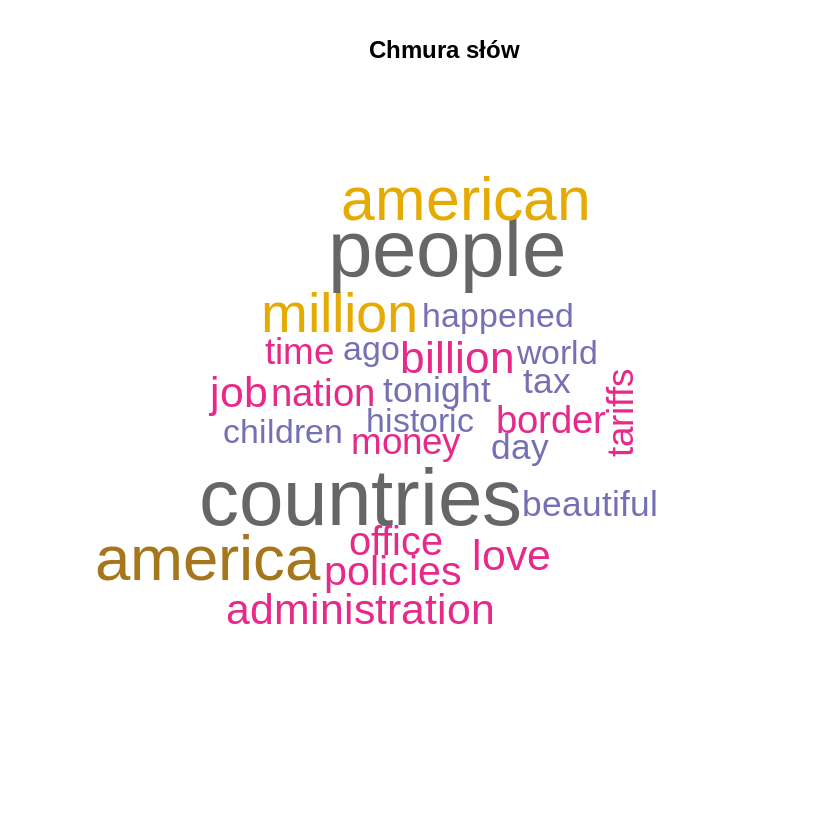

In [9]:
# Chmura słów
plot_wordcloud(freq_df, "Chmura słów", "Dark2")


In [10]:
# Wyświetl top 10
print(head(freq_df, 10))

              word freq
245      countries   47
820         people   47
47         america   36
48        american   34
732        million   31
115        billion   23
19  administration   22
613            job   22
691           love   22
844       policies   21


# Analiza sentymentu słowniki CSV ----

## Wczytaj słowniki z plików csv ----

In [11]:
afinn <- read.csv("afinn.csv", stringsAsFactors = FALSE)
bing <- read.csv("bing.csv", stringsAsFactors = FALSE)
loughran <- read.csv("loughran.csv", stringsAsFactors = FALSE)
nrc <- read.csv("nrc.csv", stringsAsFactors = FALSE)

In [12]:
tidy_tokeny <- as_tibble(freq_df)

## Analiza sentymentu przy użyciu słownika Loughran ----

In [15]:
# Użycie inner_join()
tidy_tokeny %>%
  inner_join(loughran, relationship = "many-to-many")
# Liczba słów drastycznie się zmniejszyła,
# ponieważ inner_join zachował tylko te słowa,
# które występowały w słowniku


# Zliczanie sentymentu
sentiment_review <- tidy_tokeny %>%
  inner_join(loughran, relationship = "many-to-many")

sentiment_review %>%
  count(sentiment)


# Zliczanie, które słowa są najczęstsze
# dla danego sentymentu
sentiment_review %>%
  group_by(sentiment) %>%
  arrange(desc(freq)) %>%
  ungroup()

# Filtrowanie analizy sentymentu
# i pozostawienie tylko słów
# o sentymencie pozytywnym lub negatywnym

sentiment_review2 <- sentiment_review %>%
  filter(sentiment %in% c("positive", "negative"))


word_counts <- sentiment_review2 %>%
  group_by(sentiment) %>%
  top_n(20, freq) %>%
  ungroup() %>%
  arrange(desc(freq), word) %>%
  mutate(
    word2 = factor(word, levels = rev(unique(word)))
    )

Joining with `by = join_by(word)`


word,freq,sentiment
<chr>,<dbl>,<chr>
beautiful,17,positive
law,12,litigious
dangerous,11,negative
bad,9,negative
strong,9,positive
arrests,8,negative
illegal,8,negative
successful,8,positive
criminal,7,negative


Joining with `by = join_by(word)`


sentiment,n
<chr>,<int>
constraining,5
litigious,14
negative,69
positive,35
uncertainty,5


word,freq,sentiment
<chr>,<dbl>,<chr>
beautiful,17,positive
law,12,litigious
dangerous,11,negative
bad,9,negative
strong,9,positive
arrests,8,negative
illegal,8,negative
successful,8,positive
criminal,7,negative


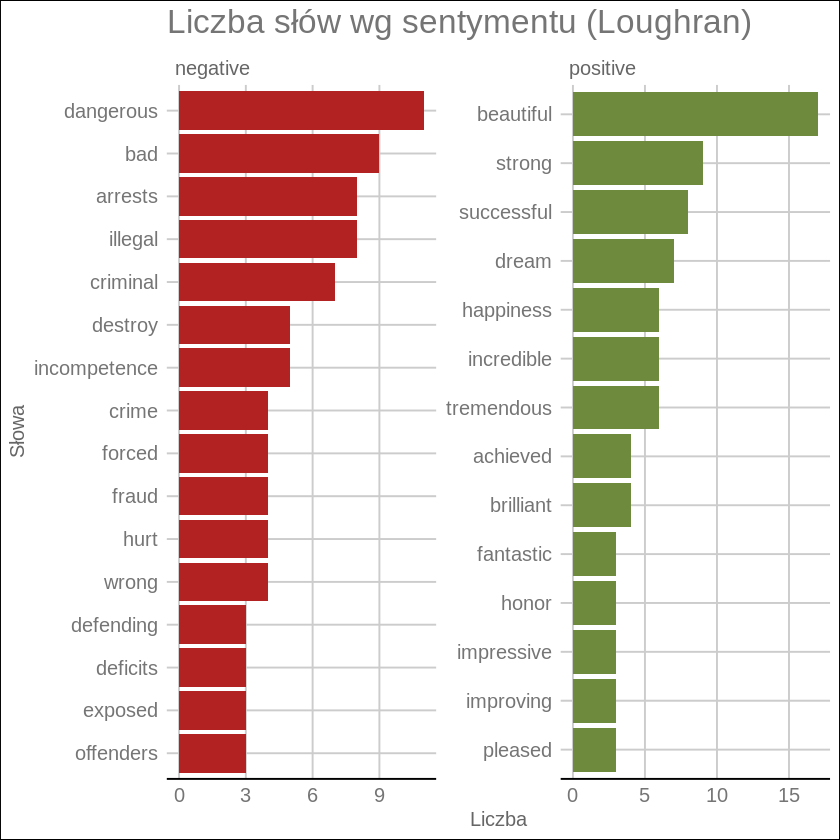

In [16]:
# Wizualizacja sentymentu
ggplot(word_counts[1:30,], aes(x=word2, y=freq, fill=sentiment)) +
  geom_col(show.legend=FALSE) +
  facet_wrap(~sentiment, scales="free") +
  coord_flip() +
  labs(x = "Słowa", y = "Liczba") +
  theme_gdocs() +
  ggtitle("Liczba słów wg sentymentu (Loughran)") +
  scale_fill_manual(values = c("firebrick", "darkolivegreen4"))

## Analiza sentymentu przy użyciu słownika NRC ----

In [18]:
# Zliczanie sentymentu
sentiment_review_nrc <- tidy_tokeny %>%
  inner_join(nrc, relationship = "many-to-many")

sentiment_review_nrc %>%
  count(sentiment)

# Zliczanie, które słowa są najczęstsze
# dla danego sentymentu
sentiment_review_nrc %>%
  group_by(sentiment) %>%
  arrange(desc(freq)) %>%
  ungroup()

# Filtrowanie analizy sentymentu
# i pozostawienie tylko słów
# o sentymencie pozytywnym lub negatywnym

sentiment_review_nrc2 <- sentiment_review_nrc %>%
  filter(sentiment %in% c("positive", "negative"))


word_counts_nrc2 <- sentiment_review_nrc2 %>%
  group_by(sentiment) %>%
  top_n(20, freq) %>%
  ungroup() %>%
  arrange(desc(freq), word) %>%
  mutate(
    word2 = factor(word, levels = rev(unique(word)))
    )

Joining with `by = join_by(word)`


sentiment,n
<chr>,<int>
anger,82
anticipation,84
disgust,53
fear,101
joy,68
negative,136
positive,173
sadness,65
surprise,45


word,freq,sentiment
<chr>,<dbl>,<chr>
job,22,positive
love,22,joy
love,22,positive
nation,19,trust
money,18,anger
money,18,anticipation
money,18,joy
money,18,positive
money,18,surprise


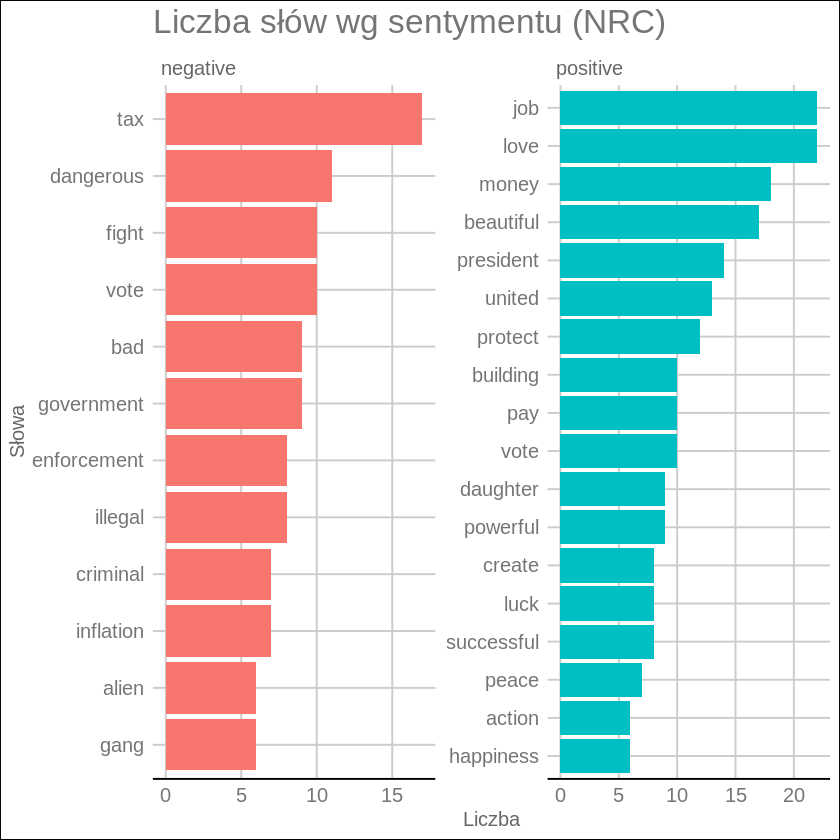

In [17]:
# Wizualizacja sentymentu
ggplot(word_counts_nrc2[1:30,], aes(x=word2, y=freq, fill=sentiment)) +
  geom_col(show.legend=FALSE) +
  facet_wrap(~sentiment, scales="free") +
  coord_flip() +
  labs(x = "Słowa", y = "Liczba") +
  theme_gdocs() +
  ggtitle("Liczba słów wg sentymentu (NRC)")

## Analiza sentymentu przy użyciu słownika Bing ----

In [19]:
# Zliczanie sentymentu
sentiment_review_bing <- tidy_tokeny %>%
  inner_join(bing)

sentiment_review_bing %>%
  count(sentiment)

# Zliczanie, które słowa są najczęstsze
# dla danego sentymentu
sentiment_review_bing %>%
  group_by(sentiment) %>%
  arrange(desc(freq)) %>%
  ungroup()

# Filtrowanie analizy sentymentu
# i pozostawienie tylko słów
# o sentymencie pozytywnym lub negatywnym

sentiment_review_bing2 <- sentiment_review_bing %>%
  filter(sentiment %in% c("positive", "negative"))


word_counts_bing2 <- sentiment_review_bing2 %>%
  group_by(sentiment) %>%
  top_n(20, freq) %>%
  ungroup() %>%
  arrange(desc(freq), word) %>%
  mutate(
    word2 = factor(word, levels = rev(unique(word)))
    )

Joining with `by = join_by(word)`


sentiment,n
<chr>,<int>
negative,110
positive,114


word,freq,sentiment
<chr>,<dbl>,<chr>
love,22,positive
beautiful,17,positive
protect,12,positive
dangerous,11,negative
hard,10,negative
bad,9,negative
killed,9,negative
powerful,9,positive
strong,9,positive


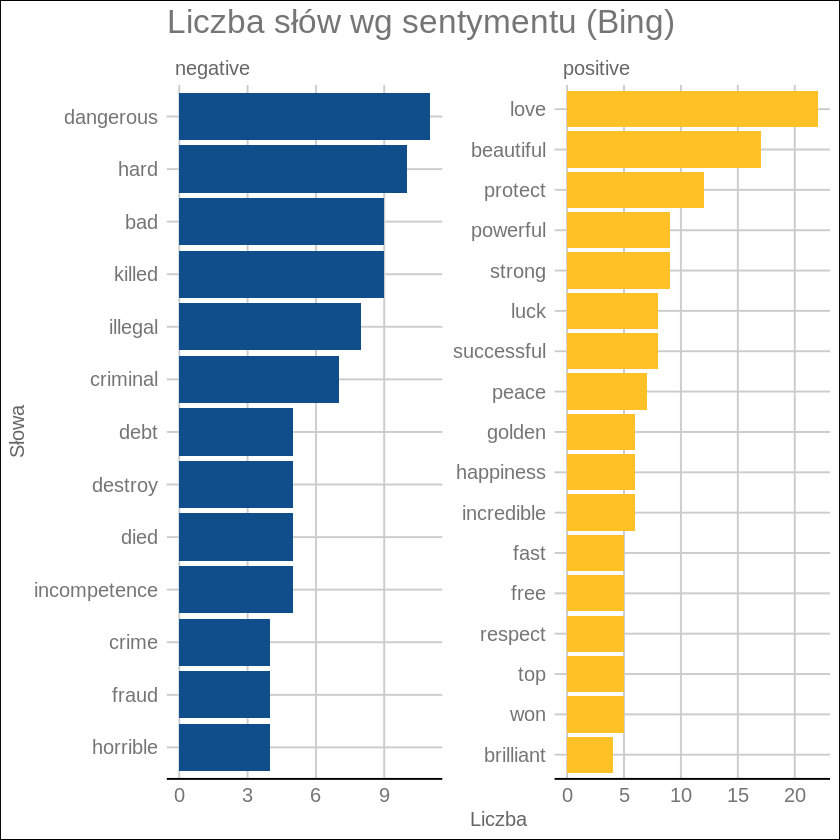

In [20]:
# Wizualizacja sentymentu
ggplot(word_counts_bing2[1:30,], aes(x=word2, y=freq, fill=sentiment)) +
  geom_col(show.legend=FALSE) +
  facet_wrap(~sentiment, scales="free") +
  coord_flip() +
  labs(x = "Słowa", y = "Liczba") +
  theme_gdocs() +
  ggtitle("Liczba słów wg sentymentu (Bing)") +
  scale_fill_manual(values = c("dodgerblue4", "goldenrod1"))

## Analiza sentymentu przy użyciu słownika Afinn ----

In [21]:
# Zliczanie sentymentu
sentiment_review_afinn <- tidy_tokeny %>%
  inner_join(afinn)

sentiment_review_afinn %>%
  count(value)

# Zliczanie, które słowa są najczęstsze
# dla danego sentymentu
sentiment_review_afinn %>%
  group_by(value) %>%
  arrange(desc(freq)) %>%
  ungroup()

# Silnie pozytywne lub silnie negatywne słowa:
# filtrowanie analizy sentymentu
# i pozostawienie tylko słów o wartości w zakresie od -5 do 5

sentiment_review_afinn3 <- sentiment_review_afinn %>%
  filter(value %in% c("3", "-3" , "4", "-4", "5", "-5"))


word_counts_afinn3 <- sentiment_review_afinn3 %>%
  group_by(value) %>%
  top_n(20, freq) %>%
  ungroup() %>%
  arrange(desc(freq), word) %>%
  mutate(
    word2 = factor(word, levels = rev(unique(word)))
    )

Joining with `by = join_by(word)`


value,n
<int>,<int>
-4,3
-3,26
-2,47
-1,25
1,27
2,45
3,22
4,6


word,freq,value
<chr>,<dbl>,<int>
love,22,3
beautiful,17,3
united,13,1
protect,12,1
fight,10,-1
hard,10,-1
pay,10,-1
stop,10,-1
bad,9,-3


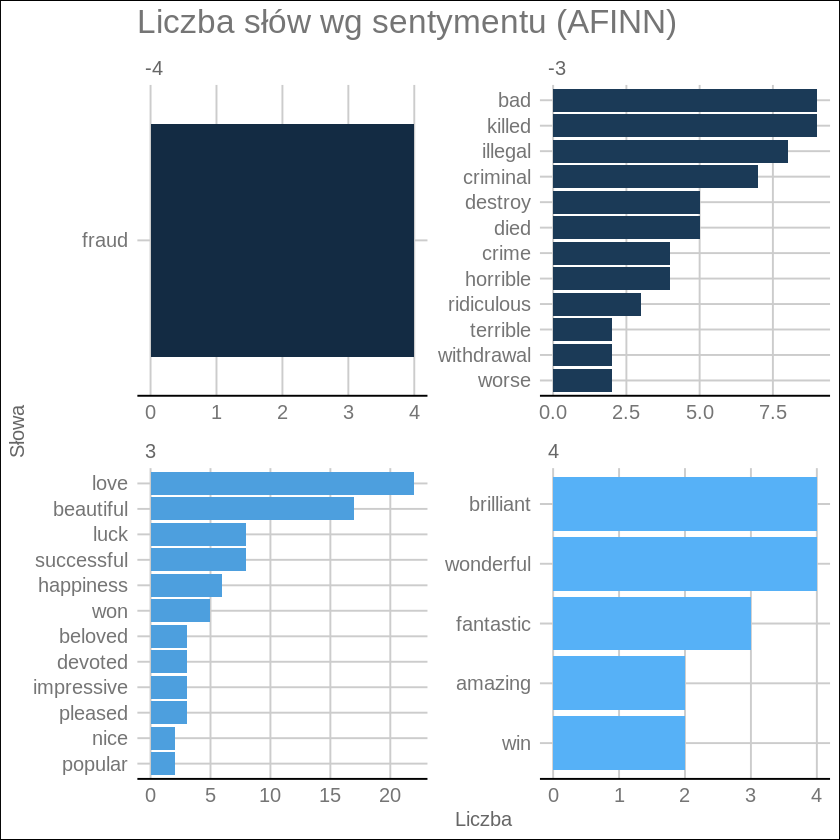

In [22]:
# Wizualizacja sentymentu
ggplot(word_counts_afinn3[1:30,], aes(x=word2, y=freq, fill=value)) +
  geom_col(show.legend=FALSE) +
  facet_wrap(~value, scales="free") +
  coord_flip() +
  labs(x = "Słowa", y = "Liczba") +
  theme_gdocs() +
  ggtitle("Liczba słów wg sentymentu (AFINN)")

# Analiza sentymentu w czasie o ustalonej długości linii ----

In [23]:
# Połączenie wszystkich słów words w jeden ciąg znaków
full_text <- paste(words, collapse = " ")


# Funkcja do dzielenia tekstu na segmenty o określonej długości
split_text_into_chunks <- function(text, chunk_size) {
  start_positions <- seq(1, nchar(text), by = chunk_size)
  chunks <- substring(text, start_positions, start_positions + chunk_size - 1)
  return(chunks)
}


# Podzielenie tekstu na segmenty
#
# ustaw min_lentgh jako jednolitą długość jednego segmentu
set_length <- 50
text_chunks <- split_text_into_chunks(full_text, set_length)


# Wyświetlenie wynikowych segmentów
# print(text_chunks)

# Analiza sentymentu przy użyciu pakietu SentimentAnalysis ----

In [24]:
sentiment <- analyzeSentiment(text_chunks)

### Słownik GI (General Inquirer) ----

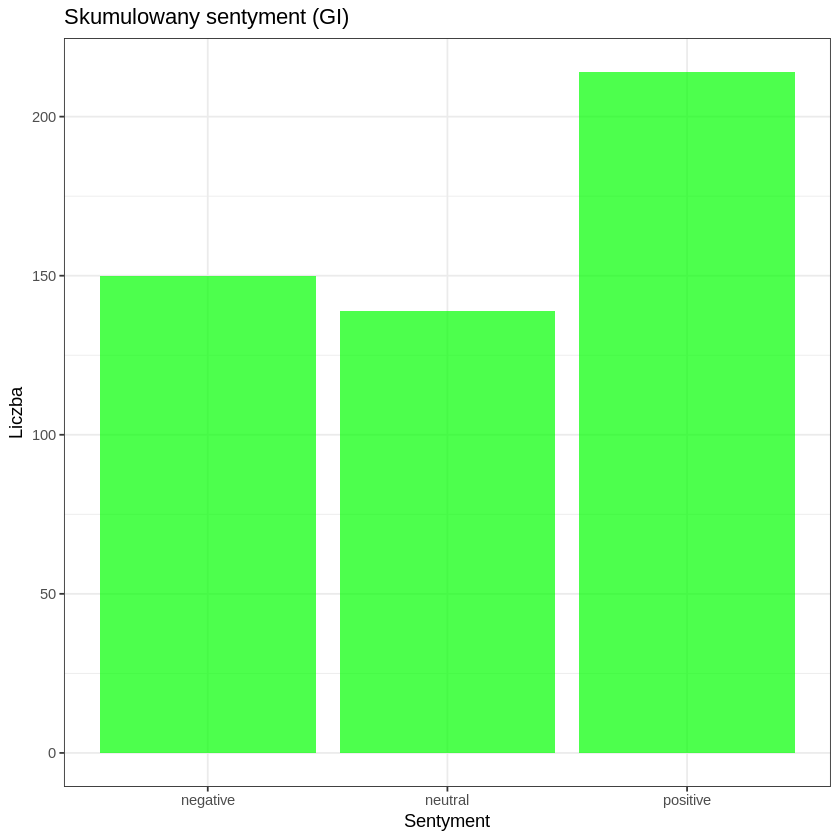

In [25]:
### Słownik GI (General Inquirer) ----
#
# Słownik ogólnego zastosowania
# zawiera listę słów pozytywnych i negatywnych
# zgodnych z psychologicznym słownikiem harwardzkim Harvard IV-4
# DictionaryGI


# Wczytaj słownik GI
# data(DictionaryGI)
# summary(DictionaryGI)


# Konwersja ciągłych wartości sentymentu
# na odpowiadające im wartości kierunkowe
# zgodnie ze słownikiem GI
sentimentGI <- convertToDirection(sentiment$SentimentGI)


# Wykres skumulowanego sentymentu kierunkowego
#plot(sentimentGI)


# Ten sam wykres w ggplot2:
# Konwersja do ramki danych (ggplot wizualizuje ramki danych)
df_GI <- data.frame(index = seq_along(sentimentGI), value = sentimentGI, Dictionary = "GI")

# Usunięcie wierszy, które zawierają NA
df_GI <- na.omit(df_GI)

ggplot(df_GI, aes(x = value)) +
  geom_bar(fill = "green", alpha = 0.7) +
  labs(title = "Skumulowany sentyment (GI)",
       x = "Sentyment",
       y = "Liczba") +
  theme_bw()

### Słownik HE (Henry’s Financial dictionary) ----

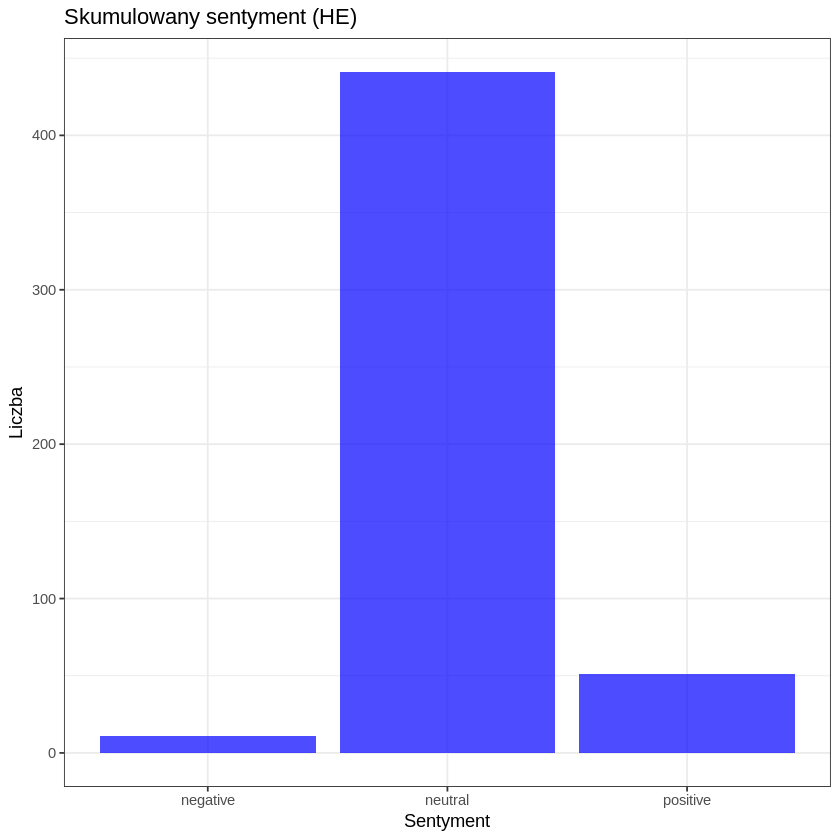

In [26]:
### Słownik HE (Henry’s Financial dictionary) ----
#
# zawiera listę słów pozytywnych i negatywnych
# zgodnych z finansowym słownikiem "Henry 2008"
# pierwszy, jaki powstał w wyniku analizy komunikatów prasowych
# dotyczących zysków w branży telekomunikacyjnej i usług IT
# DictionaryHE


# Wczytaj słownik HE
# data(DictionaryHE)
# summary(DictionaryHE)


# Konwersja ciągłych wartości sentymentu
# na odpowiadające im wartości kierunkowe
# zgodnie ze słownikiem HE
sentimentHE <- convertToDirection(sentiment$SentimentHE)


# Wykres skumulowanego sentymentu kierunkowego
# plot(sentimentHE)


# Ten sam wykres w ggplot2:
# Konwersja do ramki danych (ggplot wizualizuje ramki danych)
df_HE <- data.frame(index = seq_along(sentimentHE), value = sentimentHE, Dictionary = "HE")

# Usunięcie wierszy, które zawierają NA
df_HE <- na.omit(df_HE)

ggplot(df_HE, aes(x = value)) +
  geom_bar(fill = "blue", alpha = 0.7) +
  labs(title = "Skumulowany sentyment (HE)",
       x = "Sentyment",
       y = "Liczba") +
  theme_bw()

### Słownik LM (Loughran-McDonald Financial dictionary) ----

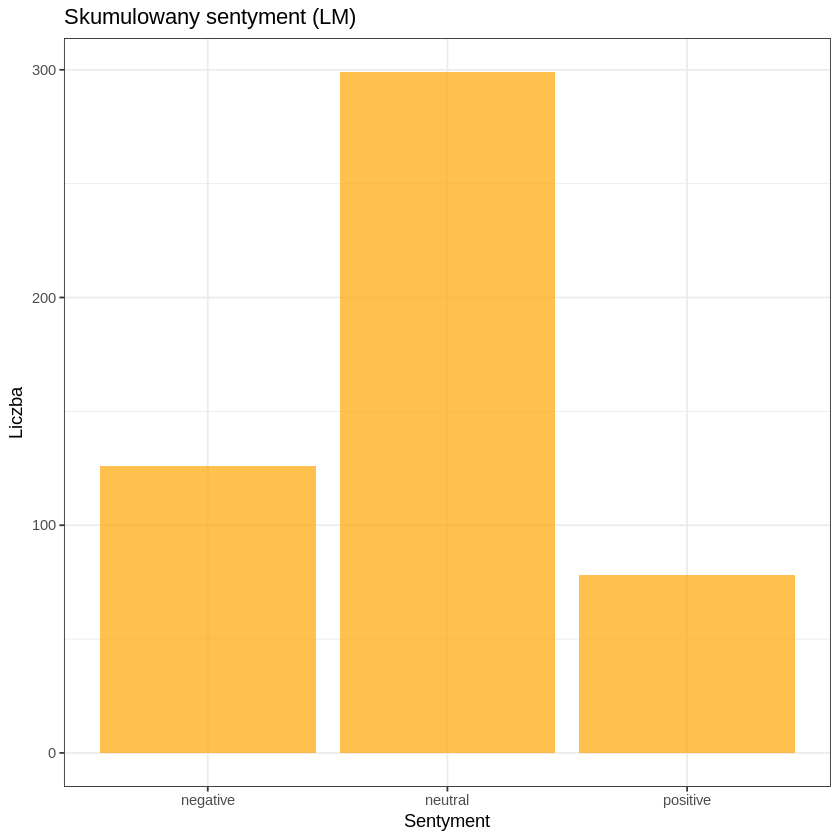

In [27]:
### Słownik LM (Loughran-McDonald Financial dictionary) ----
#
# zawiera listę słów pozytywnych i negatywnych oraz związanych z niepewnością
# zgodnych z finansowym słownikiem Loughran-McDonald
# DictionaryLM


# Wczytaj słownik LM
# data(DictionaryLM)
# summary(DictionaryLM)


# Konwersja ciągłych wartości sentymentu
# na odpowiadające im wartości kierunkowe
# zgodnie ze słownikiem LM
sentimentLM <- convertToDirection(sentiment$SentimentLM)


# Wykres skumulowanego sentymentu kierunkowego
# plot(sentimentLM)


# Ten sam wykres w ggplot2:
# Konwersja do ramki danych (ggplot wizualizuje ramki danych)
df_LM <- data.frame(index = seq_along(sentimentLM), value = sentimentLM, Dictionary = "LM")

# Usunięcie wierszy, które zawierają NA
df_LM <- na.omit(df_LM)

ggplot(df_LM, aes(x = value)) +
  geom_bar(fill = "orange", alpha = 0.7) +
  labs(title = "Skumulowany sentyment (LM)",
       x = "Sentyment",
       y = "Liczba") +
  theme_bw()

### Słownik QDAP (Quantitative Discourse Analysis Package) ----

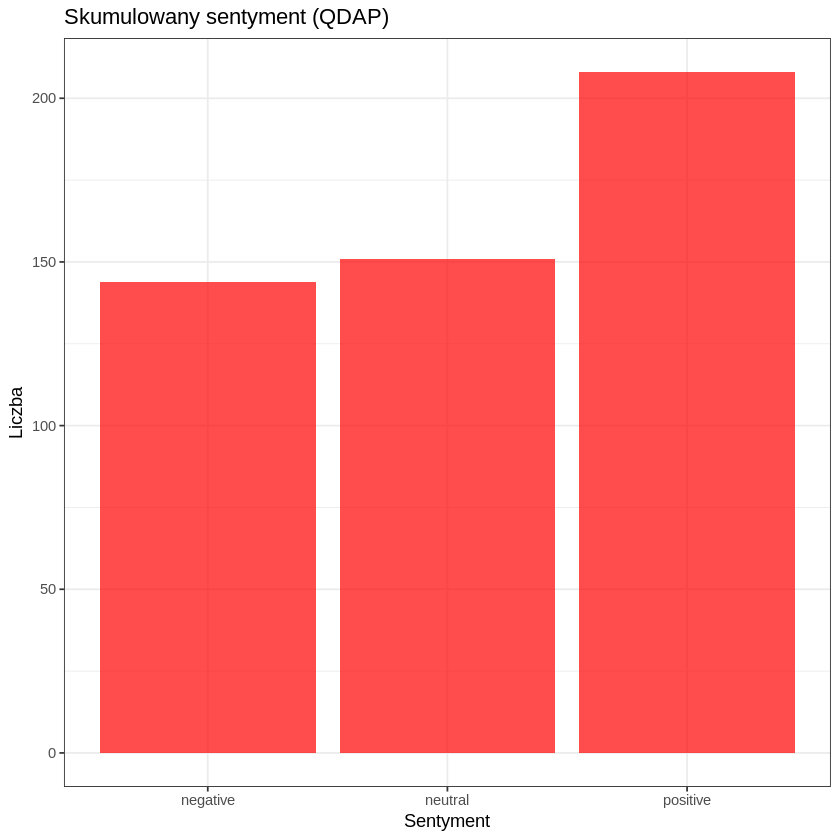

In [28]:
### Słownik QDAP (Quantitative Discourse Analysis Package) ----
#
# zawiera listę słów pozytywnych i negatywnych
# do analizy dyskursu


# Wczytaj słownik QDAP
qdap <- loadDictionaryQDAP()
# summary(qdap)


# Konwersja ciągłych wartości sentymentu
# na odpowiadające im wartości kierunkowe
# zgodnie ze słownikiem QDAP
sentimentQDAP <- convertToDirection(sentiment$SentimentQDAP)


# Wykres skumulowanego sentymentu kierunkowego
# plot(sentimentQDAP)


# Ten sam wykres w ggplot2:
# Konwersja do ramki danych (ggplot wizualizuje ramki danych)
df_QDAP <- data.frame(index = seq_along(sentimentQDAP), value = sentimentQDAP, Dictionary = "QDAP")

# Usunięcie wierszy, które zawierają NA
df_QDAP <- na.omit(df_QDAP)

ggplot(df_QDAP, aes(x = value)) +
  geom_bar(fill = "red", alpha = 0.7) +
  labs(title = "Skumulowany sentyment (QDAP)",
       x = "Sentyment",
       y = "Liczba") +
  theme_bw()

# Porównanie sentymentu na podstawie różnych słowników ----

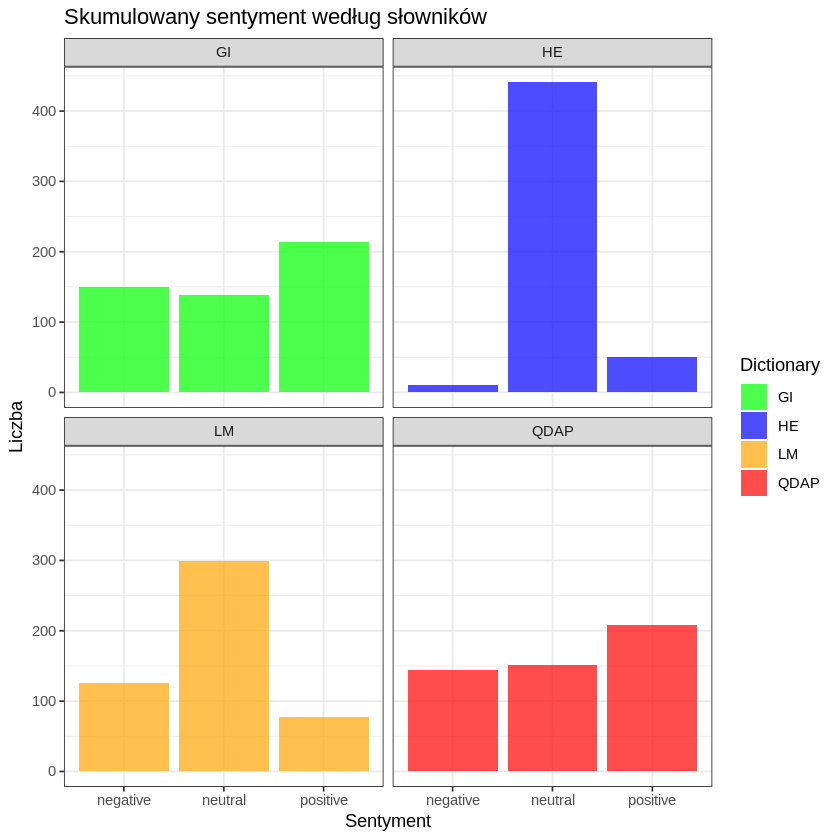

In [29]:
# Minimalistycznie
# plot(convertToDirection(sentiment$SentimentGI))
# plot(convertToDirection(sentiment$SentimentHE))
# plot(convertToDirection(sentiment$SentimentLM))
# plot(convertToDirection(sentiment$SentimentQDAP))


# Wizualnie lepsze w ggplot2
# Połączenie poszczególnych ramek w jedną ramkę
df_all <- bind_rows(df_GI, df_HE, df_LM, df_QDAP)

# Tworzenie wykresu z podziałem na słowniki
ggplot(df_all, aes(x = value, fill = Dictionary)) +
  geom_bar(alpha = 0.7) +
  labs(title = "Skumulowany sentyment według słowników",
       x = "Sentyment",
       y = "Liczba") +
  theme_bw() +
  facet_wrap(~Dictionary) +  # Podział na cztery osobne wykresy
  scale_fill_manual(values = c("GI" = "green",
                               "HE" = "blue",
                               "LM" = "orange",
                               "QDAP" = "red" ))


# Agregowanie sentymentu z różnych słowników w czasie ----

In [30]:
# Sprawdzenie ilości obserwacji
length(sentiment[,1])


# Utworzenie ramki danych
df_all <- data.frame(sentence=1:length(sentiment[,1]),
                     GI=sentiment$SentimentGI,
                     HE=sentiment$SentimentHE,
                     LM=sentiment$SentimentLM,
                     QDAP=sentiment$SentimentQDAP)



# USUNIĘCIE BRAKUJĄCYCH WARTOŚCI
# gdyż wartości NA (puste) uniemożliwiają generowanie wykresu w ggplot
#

# Usunięcie wartości NA
# Wybranie tylko niekompletnych przypadków:
puste <- df_all[!complete.cases(df_all), ]


# Usunięcie pustych obserwacji
# np. dla zmiennej QDAP (wszystkie mają NA)
df_all <- df_all[!is.na(df_all$QDAP), ]


# Sprawdzenie, czy wartości NA zostały usunięte
# wtedy puste2 ma 0 wierszy:
puste2 <- df_all[!complete.cases(df_all), ]
puste2

[1] 503

sentence,GI,HE,LM,QDAP
<int>,<dbl>,<dbl>,<dbl>,<dbl>


# Wykresy przedstawiające ewolucję sentymentu w czasie ----

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


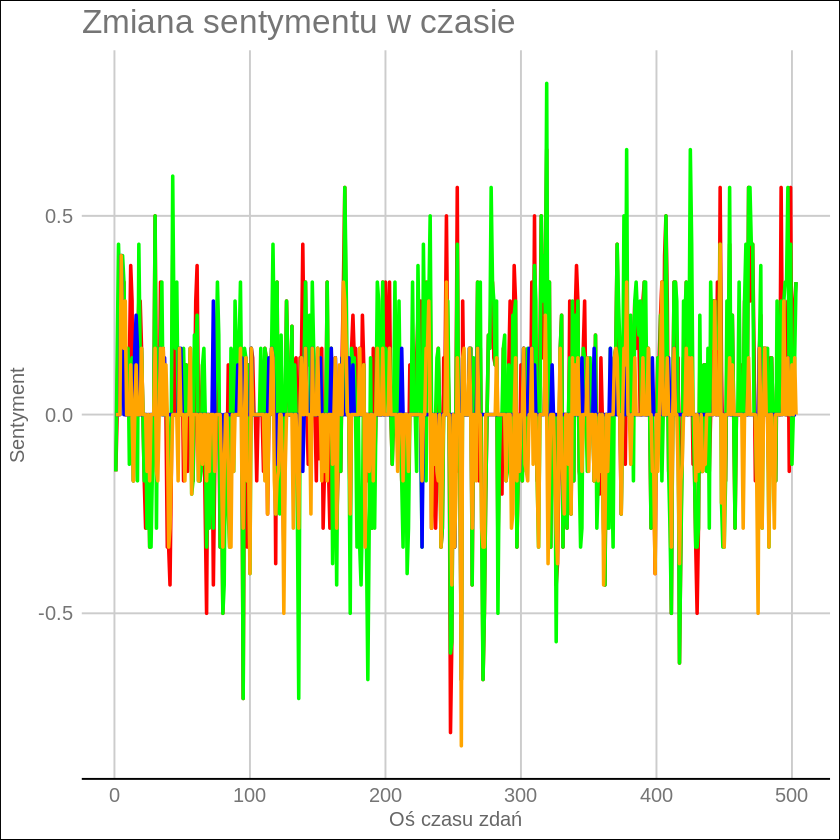

In [31]:
# Wykresy przedstawiające ewolucję sentymentu w czasie ----

ggplot(df_all, aes(x=sentence, y=QDAP)) +
  geom_line(color="red", size=1) +
  geom_line(aes(x=sentence, y=GI), color="green", size=1) +
  geom_line(aes(x=sentence, y=HE), color="blue", size=1) +
  geom_line(aes(x=sentence, y=LM), color="orange", size=1) +
  labs(x = "Oś czasu zdań", y = "Sentyment") +
  theme_gdocs() +
  ggtitle("Zmiana sentymentu w czasie")

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


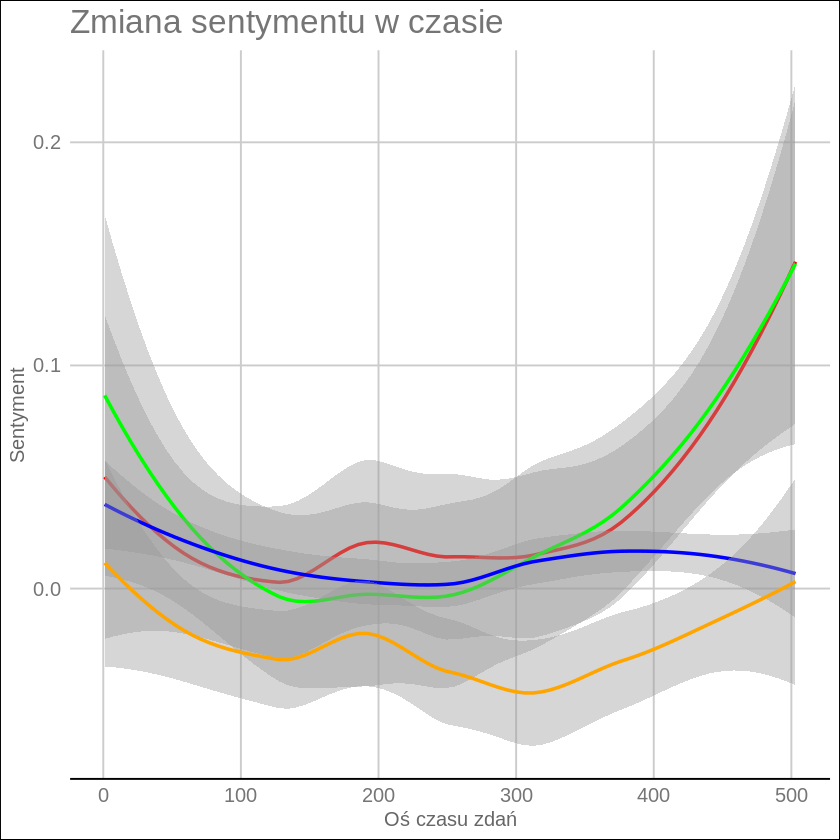

In [32]:
ggplot(df_all, aes(x=sentence, y=QDAP)) +
  geom_smooth(color="red") +
  geom_smooth(aes(x=sentence, y=GI), color="green") +
  geom_smooth(aes(x=sentence, y=HE), color="blue") +
  geom_smooth(aes(x=sentence, y=LM), color="orange") +
  labs(x = "Oś czasu zdań", y = "Sentyment") +
  theme_gdocs() +
  ggtitle("Zmiana sentymentu w czasie")